In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def make_trajectory(x0, y0, velocity, angle, t_max, t_step):
    g = 9.81
    radian = 180 / np.pi
    angle_rad = angle / radian
    vx = np.cos(angle_rad) * velocity
    vy = np.sin(angle_rad) * velocity
    t = np.arange(0, t_max, t_step)
    x = vx * t + x0
    y = vy * t - g * t * t / 2 + y0
    return x, y

In [3]:
def EpotForShot(M, V):
    Ek_bullet = M * V ** 2 / 2
    #print(Ek_bullet)
    Ek_string = 3.88 * 10 ** -5 * V ** 3
    #print(Ek_string)
    Efr_air = 12 * 10 ** -7 * V ** 4
    #print(Efr_air)
    total_E = Ek_bullet + Ek_string + Efr_air
    return total_E
#print(EpotForShot(M , V))

In [4]:
def I(U , R):
    return U / R
def R(U , I):
    return U / I
def U(I , R):
    return I * R

In [5]:
def MForShot(E_pot, V):
    a = 3.88 * 10 ** -5
    b = 12 * 10 ** -7
    M = 2 * E_pot / V ** 2 - 2 * a * V  - 2 * b * V ** 2
    return M
#print(MForShot(E_pot , V))

In [6]:
def Bisect(L , R , F):
    if F(L) < 0 < F(R) :
        for i in range(50):
            M = (L + R) / 2
            FM = F(M)
            # print('L =', L, 'R =', R,'M =', M)
            if FM > 0:
                R = M
            elif FM < 0:
                L = M
            else:
                # print(M)
                break
    elif F(R) < 0 < F(L):
        M = (L + R) / 2
        for i in range(50):
            M = (L + R) / 2
            FM = F(M)
            # print('L =', L, 'R =', R,'M =', M)
            if FM > 0:
                L = M
            elif FM < 0:
                R = M
            else:
                # print(M)
                break
    elif F(R) == 0:
        return R
    elif F(L) == 0:
        return L
        # print(M)
    else:
        # print('L =', F(L) , L ,'R =', F(R), R)
        return 
    return M

    # В L функция меньше 0, а в R функция больше нуля(Или наоборот)

In [7]:
def VForShot(E_pot, M):
    def Equation(V):
        E_pot_calc = EpotForShot(M, V)
        dif = E_pot - E_pot_calc
        #print( V ,dif)
        return dif
    V = Bisect(0 , 120 , Equation)
    return V

(0.0, 200.0)

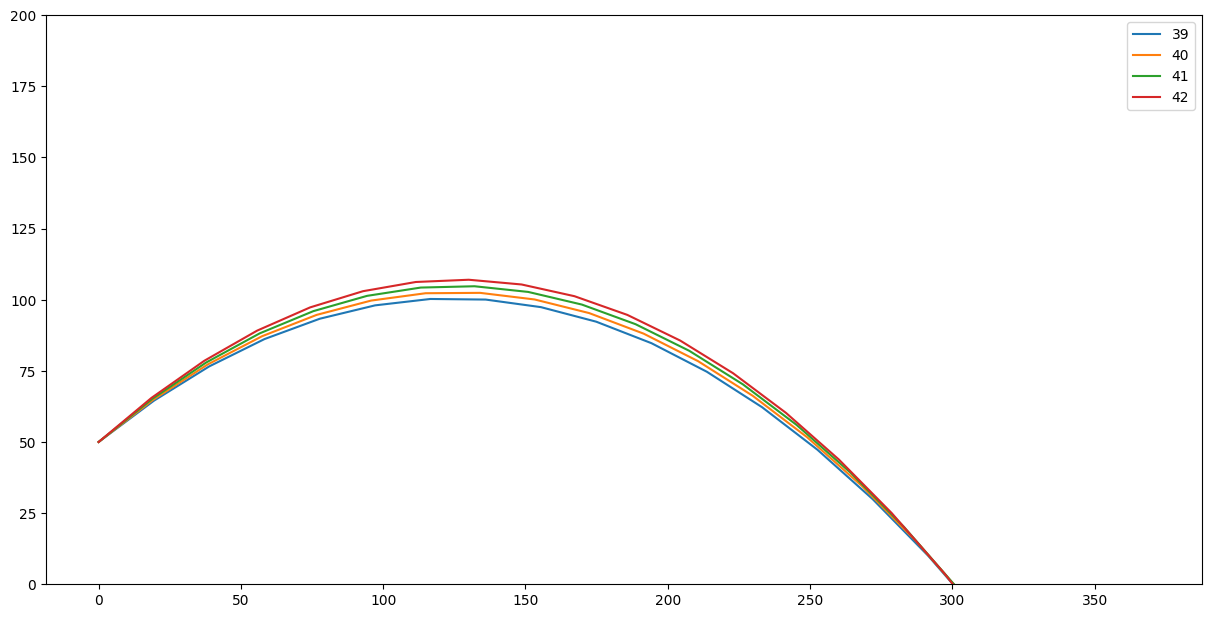

In [15]:
figure = plt.figure(constrained_layout=True,figsize=(12,8))
ax = figure.add_subplot()
ax.set_aspect('equal')
for z in range(39,43,1):
    x,y = make_trajectory(0, 50, 50, z, 10, 0.5)
    line, = ax.plot(x,y)
    line.set_label(str(z))
ax.legend()
ax.set_ylim(0,200)
#ax.set_xlim(297.5, 302.5)

(297.5, 302.5)

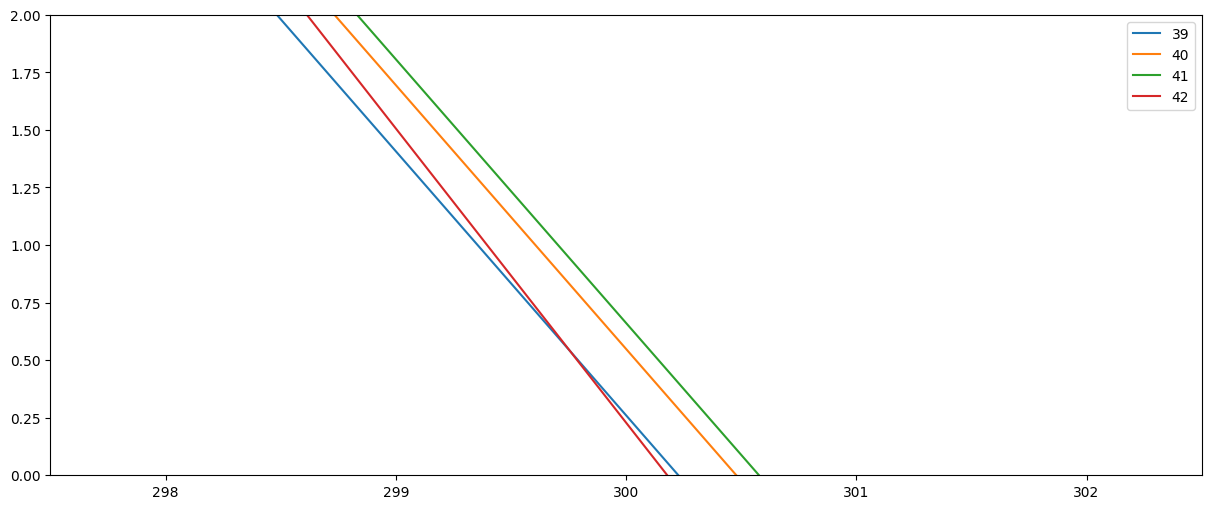

In [8]:
figure = plt.figure(constrained_layout=True,figsize=(12,8))
ax = figure.add_subplot()
ax.set_aspect('equal')
for z in range(39,43,1): #Влияние угла на дальность полета
    x,y = make_trajectory(0, 50, 50, z, 10, 0.5)
    line, = ax.plot(x,y)
    line.set_label(str(z))
ax.legend()
ax.set_ylim(0,2)
ax.set_xlim(297.5, 302.5)

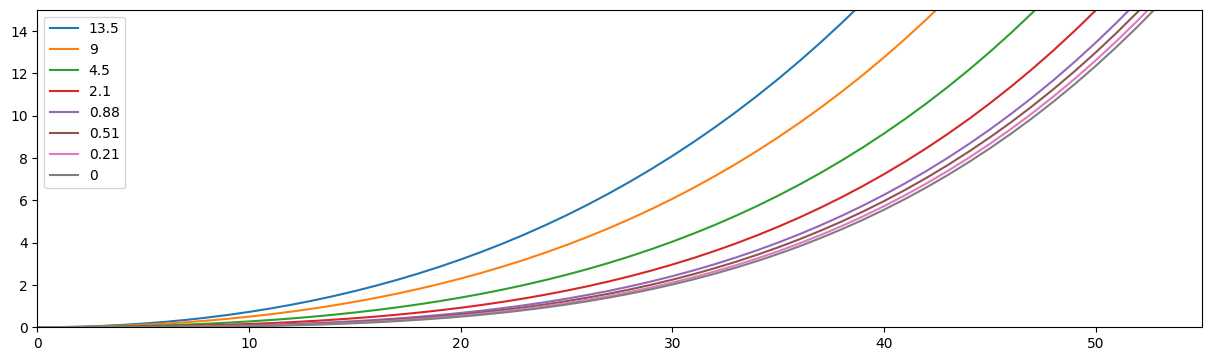

In [9]:
figure = plt.figure(constrained_layout=True,figsize=(12,8))
ax = figure.add_subplot()
ax.set_aspect('equal')
ax.set_ylim(0, 15)
ax.set_xlim(0, 55)
for M_g in [13.5, 9 ,4.5 , 2.1 , 0.88 , 0.51 , 0.21, 0]:#Влияние массы на потенциальную энергию
    M_kg = M_g / 1000
    V = np.arange(0 , 60 , 1)
    Epot = EpotForShot(M_kg, V)
    plotresult = ax.plot(V, Epot)
    plotresult[0].set_label(M_g)
ax.legend()

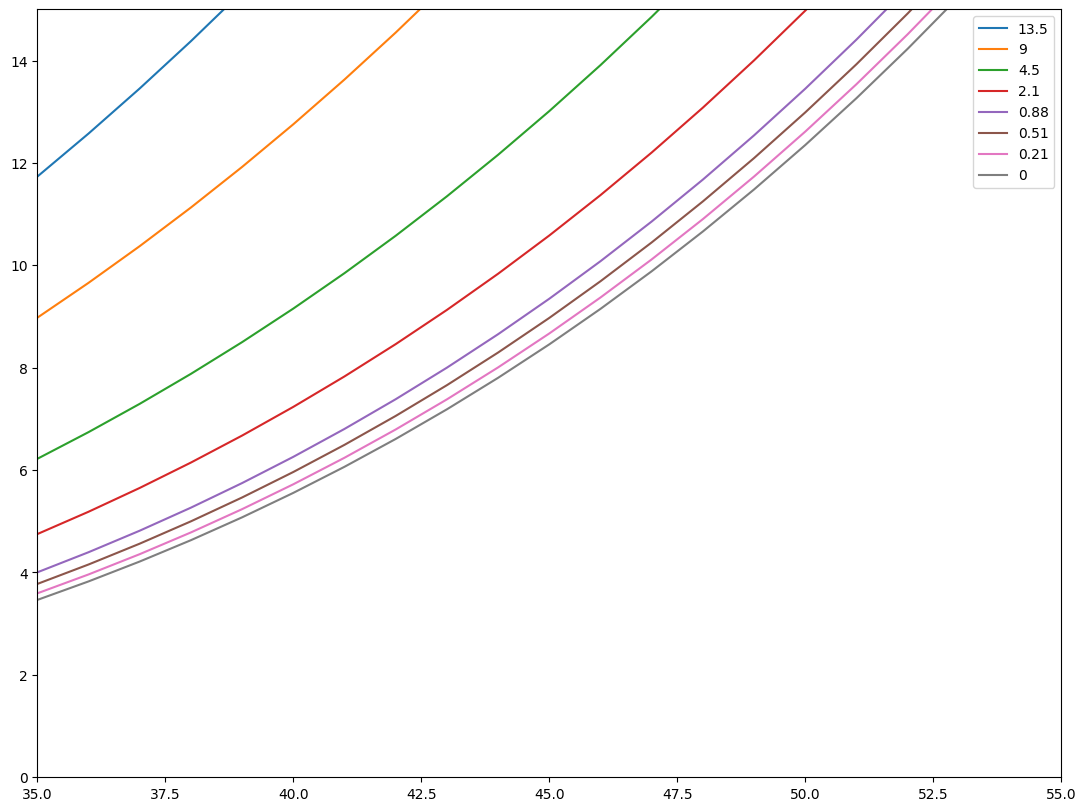

In [16]:
figure = plt.figure(constrained_layout=True,figsize=(12,8))
ax = figure.add_subplot()
ax.set_aspect('equal')
ax.set_ylim(0, 15)
ax.set_xlim(35, 55)
for M_g in [13.5, 9 ,4.5 , 2.1 , 0.88 , 0.51 , 0.21, 0]: #И да. При нулевой массе тоже результат конечен, ибо трение о воздух!
    M_kg = M_g / 1000
    V = np.arange(0 , 60 , 1)
    Epot = EpotForShot(M_kg, V)
    plotresult = ax.plot(V, Epot)
    plotresult[0].set_label(M_g)
ax.legend()